# Visualizing Earnings based on College Majors

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

###### Reading data using pandas and summarizing the data set

In [2]:
recent_grads=pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


###### Removing Null value rows and Data cleaning

In [3]:
raw_data_count=recent_grads.shape[0]
recent_grads=recent_grads.dropna(axis=0,how='any')
recent_grads['ShareMen']=recent_grads['Men']/recent_grads['Total']

###### Understanding correlations between Gender and Median Salary

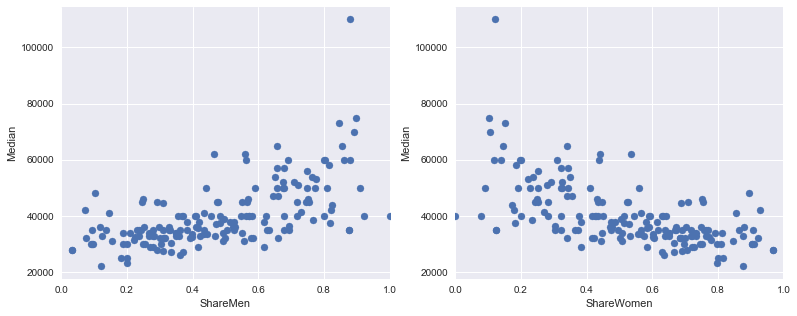

In [4]:
%matplotlib inline
sns.set()
y=['ShareMen','ShareWomen']
fig=plt.figure(figsize=(20,5))
for idx,col in enumerate(y):
    ax=fig.add_subplot(1,3,idx+1)
    ax.scatter(y=recent_grads['Median'],x=recent_grads[col])
    ax.set_ylabel('Median')
    ax.set_xlabel(col)
    ax.set_xlim((0,1))
plt.show()

From the above scatter plot, it is observed that Median salary has weak Positive Correlation with Male percentage and weak Negative correlation with Women percentage in the Major.Median salaries increased with total Men in the Major and more Men studied a Major with high paying jobs unlike Women.

###### Understanding correlations between Gender and Median Salary

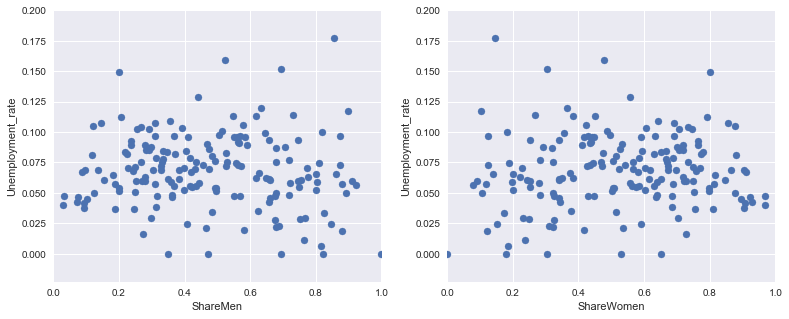

In [5]:
y=['ShareMen','ShareWomen']
fig=plt.figure(figsize=(20,5))
for idx,col in enumerate(y):
    ax=fig.add_subplot(1,3,idx+1)
    ax.scatter(y=recent_grads['Unemployment_rate'],x=recent_grads[col])
    ax.set_ylabel('Unemployment_rate')
    ax.set_xlabel(col)
    ax.set_xlim((0,1))
plt.show()

Observing the scatter plots from above, it is evident that there is no correlation between Unemployment rate and Gender in the Major

###### Understanding the distribution of Median and Unemployment rate

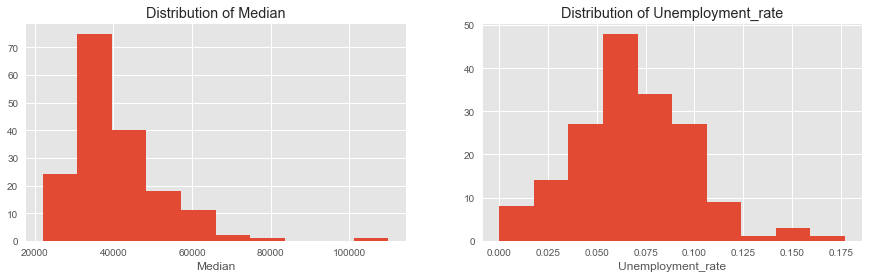

In [6]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(15,4))
cols=['Median','Unemployment_rate']
for idx,val in enumerate(cols):
    ax=fig.add_subplot(1,2,idx+1)
    ax.hist(recent_grads[val])
    ax.set_xlabel(val)
    ax.set_title('Distribution of '+val)
plt.show()

Median salaries are Right skewed and Unemployment rate resembles a Normal distribution

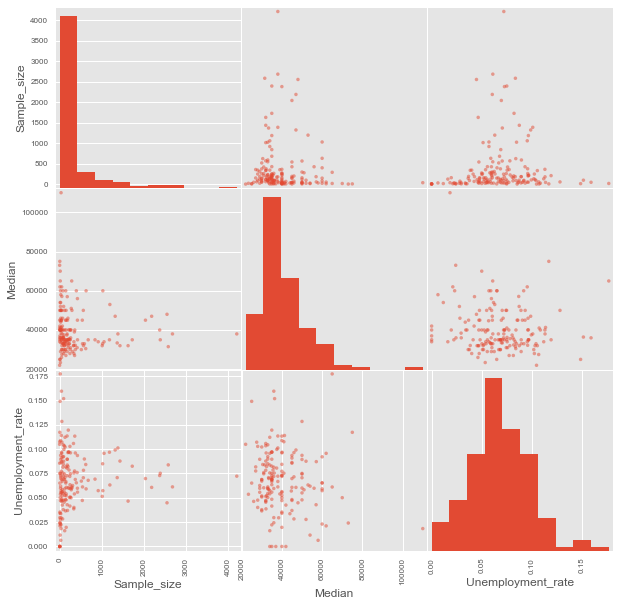

In [7]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))
plt.show()

###### Comparing the Median Salaries by Major Category between Men and Women

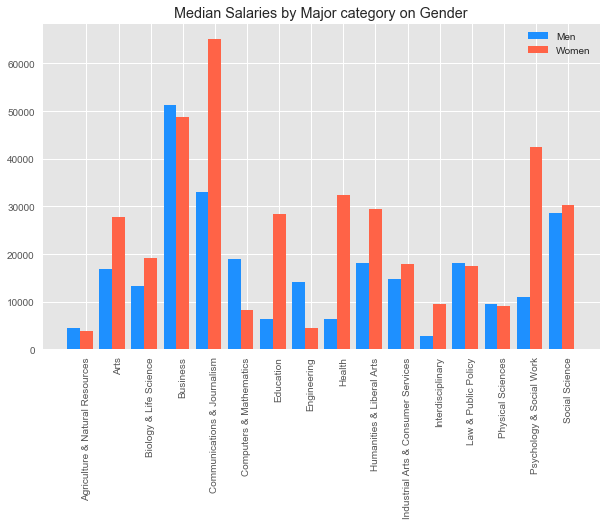

In [8]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
group1=recent_grads.pivot_table(index='Major_category',values=['Men','Women'],aggfunc=np.mean)
bar_positions1=np.arange(16)+0.6
bar_positions2=np.arange(16)+1
bar_heights1=group1['Men'].values
bar_heights2=group1['Women'].values
ax.bar(bar_positions1,bar_heights1,0.4,label='Men',color='dodgerblue')
ax.bar(bar_positions2,bar_heights2,0.4,color='tomato',label='Women')
ax.set_xticks(range(1,17))
ax.set_xticklabels(group1.index)
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Median Salaries by Major category on Gender')
plt.show()